In [1]:
# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Preprocessing parameters

In [21]:
DATASET_PATH = './data/samples_allGuitar_20480_Mm7_R1D.csv'
WINDOW = 'hamming'
WIN_LENGTH = 128
N_FFT = 20480
HOP_LENGTH = 258

PREPROCESSED_X_PATH = './data/preprocessed_X.pkl'
PREPROCESSED_Y_PATH = './data/preprocessed_y.pkl'

In [3]:
chords_df = pd.read_csv(DATASET_PATH)

In [8]:
import librosa
import librosa.display
from random import randint
%matplotlib inline

random_sample = np.array(chords_df.iloc[randint(0,1000), :-1], dtype=np.float)
sample_stft = librosa.core.stft(y=random_sample, n_fft=N_FFT, hop_length=HOP_LENGHT, win_length=WIN_LENGHT, 
                           window=WINDOW, center=True, dtype=np.float, pad_mode='reflect')

sample_chroma = librosa.feature.chroma_stft(y=random_sample, 
                                            sr=44100, n_fft=20480, hop_length=258)

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\librosa\core\spectrum.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]].conj()
C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):


C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\librosa\display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


Formato da matriz: (10241, 80)


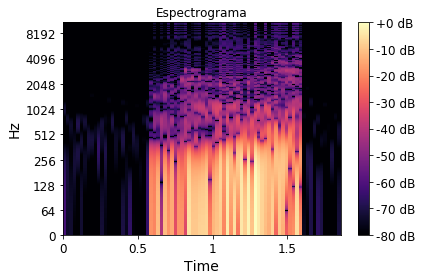

In [11]:
import matplotlib.pyplot as plt
import librosa.display
librosa.display.specshow(librosa.amplitude_to_db(sample_stft,ref=np.max),y_axis='log', x_axis='time')
plt.title('Espectrograma')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

print("Formato da matriz:", sample_stft.shape)

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\librosa\display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


Formato da matriz chroma: (12, 80)
Wall time: 232 ms


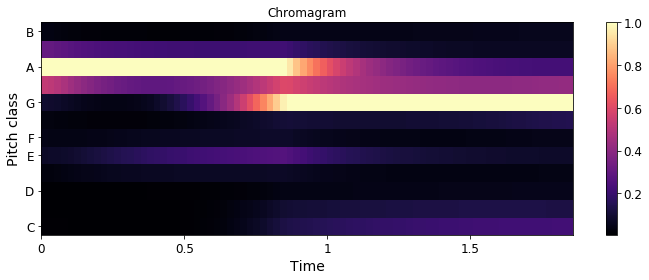

In [18]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(sample_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

print("Formato da matriz chroma:", sample_chroma.shape)

In [19]:
%%time
X = np.array(chords_df.iloc[:,:-1], dtype=np.float)
y = np.array(chords_df.iloc[:,-1], dtype=np.float)

processed_X = np.zeros((len(X),12,80,1), dtype=np.float)
processed_y = np.zeros(len(y), dtype=np.float)
X_fft_new = np.zeros(20480)

for i in range(len(X)):
    row_X = librosa.feature.chroma_stft(y=X[i],
                                sr=44100, n_fft=N_FFT,
                                hop_length=HOP_LENGTH)

    row_X_3d = np.atleast_3d(row_X)
    processed_X[i] = row_X_3d
    processed_y[i] = y[i]
    if i % 400 == 0:
        print(i, "processed rows")

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):


0 processed rows
400 processed rows
800 processed rows
1200 processed rows
1600 processed rows
2000 processed rows
2400 processed rows
2800 processed rows
3200 processed rows
Wall time: 7min 11s


In [22]:
processed_X.dump(PREPROCESSED_X_PATH)
processed_y.dump(PREPROCESSED_Y_PATH)